In [51]:
#Import bilbiotek
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [52]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [53]:
#Przeskaluj wartości z zakresu 0–255 do zakresu 0–1
X_train = X_train / 255.0
X_test = X_test / 255.0

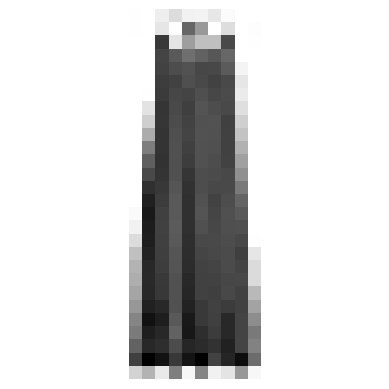

In [54]:
plt.imshow(X_train[2137], cmap="binary")
plt.axis('off')
plt.show()

In [55]:
#Utwórz listę nazw kategorii zgodnie ze specyfikacją zbioru danych:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[2137]]

'sukienka'

In [56]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Flatten(input_shape=[28, 28]))
model_1.add(keras.layers.Dense(300, activation='relu'))
model_1.add(keras.layers.Dense(100, activation='relu'))
model_1.add(keras.layers.Dense(10, activation='softmax'))

C:\Users\Michał\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model_1.summary()
tf.keras.utils.plot_model(model_1, "fashion_mnist.png", show_shapes=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [58]:
model_1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [59]:
logdir = os.path.join(os.curdir, "image_logs") # Tworzenie ścieżki do folderu z logami TensorBoard
# Utworzenie obiektu callback dla TensorBoard
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

# Trening modelu z użyciem danych X_train i y_train przez 20 epok
# Wykorzystanie 10% zbioru uczącego jako walidacyjnego
# Walidacja dodatkowo na zbiorze testowym (X_test, y_test)
history = model_1.fit(X_train, y_train, epochs=20, #rzyucz model 20 epok
                    validation_split=0.1, #wykorzystaj 10% zbioru uczącego
                    validation_data=(X_test, y_test),
                    callbacks=[tensorboard_cb])

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} . is not a directory [Op:CreateSummaryFileWriter] name: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: sukienka
Confidence: 0.1919138
Truth: spodnie


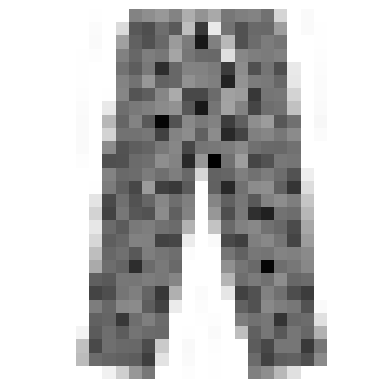

In [61]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model_1.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [62]:
#Czy podpisy odpowiadają zawartości obrazków? - Nie zawsze
#Zapisz model w pliku fashion_clf.keras.
model_1.save("fashion_clf.keras")

In [63]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
housing = fetch_california_housing()


In [66]:
#Podziel zbiór na uczący, walidacyjny i testowy. Tym razem ręcznie wydziel zbiór walidacyjny
#(train_test_split) i nie korzystaj z argumentu validation_split metody fit.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(housing["data"], housing["target"], test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [68]:
#Tworzenie modelu:
#model = keras.models.Sequential()
#• Warstwy dodajemy jako instancje odpowiednich klas z pakietu keras.layers:
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
#model.add(keras.layers.Dense(300, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"

In [69]:
#Utwórz model, zawierający:
#• warstwę normalizującą wartości cech,
#• 3 warstwy po 50 neuronów,
#• warstwę wyjściową odpowiednią do regresji pojedynczej wartości.


In [70]:
import tensorflow as tf
from tensorflow import keras

# Normalizacja danych wyjściowych
normalizer = keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(y_train)

In [71]:
model1 = keras.models.Sequential()
model1.add(normalizer)
model1.add(keras.layers.Dense(50, activation='relu'))
model1.add(keras.layers.Dense(50, activation='relu'))
model1.add(keras.layers.Dense(50, activation='relu'))
model1.add(keras.layers.Dense(1))

In [37]:
#Skompiluj go używając błędu średniokwadratwego jako funkcji straty i optymalizatora Adam,
#wyliczając dodatkowo RMSE jako metrykę. Pamiętaj o skalibrowaniu warstwy normalizacyjnej.

In [72]:
# Kompilacja modelu z metryką RootMeanSquaredError
model1.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=[keras.metrics.RootMeanSquaredError(name="root_mean_squared_error")]
)

In [73]:
#• Bardzo częste zastosowanie – early stopping:
#early_stopping_cb = keras.callbacks.EarlyStopping(
#patience=10,
#restore_best_weights=True)

In [74]:
#Przygotuj callback early stopping o cierpliwości równej 5 epok, minimalnej wartości poprawy
#wynoszącej 0.01 i włączając wyświetlanie komunikatów o przerwaniu uczenia na ekranie.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [75]:
#Podobnie jak w poprzednim ćwiczeniu, przygotuj callback Tensorboard, tak aby zbierał logi do
#katalogu housing_logs.

In [78]:
#root_logdir = os.path.join(os.curdir, "my_logs")
#def get_run_logdir():
#import time
#run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
#return os.path.join(root_logdir, run_id)
#run_logdir = get_run_logdir()
# ...
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
#history = model.fit(X_train, y_train, epochs=30,
#validation_data=(X_valid, y_valid),
#callbacks=[checkpoint_cb, tensorboard_cb])

In [79]:
import time

In [90]:
root_logdir = os.path.join(os.curdir, "housing_logs")

In [81]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()


In [82]:
tensorboard = tf.keras.callbacks.TensorBoard(root_logdir)

In [83]:
#Przeprowadź uczenie modelu korzystając z obu callbacków (early stopping i TensorBoard). Jaką
#liczbę epok uczenia należy podać w tym przypadku?

In [93]:
history = model1.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid), 
                            callbacks=[callback_early_stopping, tensorboard])

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} .\housing_logs is not a directory [Op:CreateSummaryFileWriter] name: 

In [85]:
#Zapisz model w pliku reg_housing_1.keras.

In [86]:
model1.save("reg_housing_1.keras")

In [87]:
#Utwórz jeszcze co najmniej dwa modele o innej strukturze – poeksperymentuj z liczbą
#warstw oraz liczbą jednostek na jednej warstwie. Zapisz je w plikach reg_housing_2.keras,
#reg_housing_3.keras, itd. Zapisuj logi TensorBoard w kolejnych podkatalogach katalogu
#housing_logs.

In [ ]:
#model2

In [92]:
import tensorflow as tf
from tensorflow import keras
import os
import time

# Normalizacja danych wyjściowych
normalizer = keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(y_train)

model2 = keras.models.Sequential()
model2.add(normalizer)
model2.add(keras.layers.Dense(50, activation='relu'))
model2.add(keras.layers.Dense(30, activation='relu'))
model2.add(keras.layers.Dense(1))

# Kompilacja modelu z metryką RootMeanSquaredError
model2.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=[keras.metrics.RootMeanSquaredError(name="root_mean_squared_error")]
)

callback_early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

# Utworzenie katalogu logów
root_logdir = os.path.join(os.curdir, "housing_logs")
os.makedirs(root_logdir, exist_ok=True)

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard = tf.keras.callbacks.TensorBoard(run_logdir)

history = model2.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid), 
                     callbacks=[callback_early_stopping, tensorboard])

model2.save("reg_housing_2.keras")


FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} .\housing_logs is not a directory [Op:CreateSummaryFileWriter] name: 

In [48]:
#model3

In [89]:
# Normalizacja danych wyjściowych
normalizer = keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(y_train)
model3 = keras.models.Sequential()
model3.add(normalizer)
model3.add(keras.layers.Dense(50, activation='relu'))
model3.add(keras.layers.Dense(40, activation='relu'))
model3.add(keras.layers.Dense(30, activation='relu'))
model3.add(keras.layers.Dense(1))

# Kompilacja modelu z metryką RootMeanSquaredError
model3.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=[keras.metrics.RootMeanSquaredError(name="root_mean_squared_error")]
)

callback_early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)
root_logdir = os.path.join(os.curdir, "housing_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard = tf.keras.callbacks.TensorBoard(root_logdir)

history = model3.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid), 
                            callbacks=[callback_early_stopping, tensorboard])

model3.save("reg_housing_3.keras")

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} . is not a directory [Op:CreateSummaryFileWriter] name: 